# Group 3 - Project 3

Daniel Lesh, Sarah Fede, Akshay Bhagwat, and Shiv Parekh

---




## Background Information
In this project, we will be analyzing 10 stocks in the Energy Sector where we believe we can make our client the most profit while minimizing risk. 
Before selecting the 10 best stocks we believe will best maximize return while minimizing risk in the portfolio we are building, we want to provide some background analysis on **23** stocks in the Energy Sector. 
* APA - Apa Corp
* BKR -	Baker Hughes Company
* COG - Cabot Oil & Gas Corp
* COP - Conocophillips
* CVX - Chevron Corp
* DVN - Devon Energy Corp
* EOG -	Eog Resources
* FANG -	Diamondback Energy
* HAL -	Halliburton Company
* HES - Hess Corp
* HFC - Hollyfrontier Corp
* KMI - Kinder Morgan
* MPC -	Marathon Petroleum Corp
* MRO -	Marathon Oil Corp
* NOV -	Nov Inc
* OKE -	Oneok Inc
* OXY	- Occidental Petroleum Corp
* PSX	- Phillips 66
* PXD	- Pioneer Natural Resources Company
* SLB	- Schlumberger N.V.
* VLO	- Valero Energy Corp
* WMB	- Williams Companies
* XOM	- Exxon Mobil Corp

The following 5 charts below examine the Net Income vs. Dividend Yield, P/E Ratio, Excess Return vs. YTD Change, Risk Assessment (Beta), and Comparable EPS:






> ### Net Income vs. Dividend Yield



> 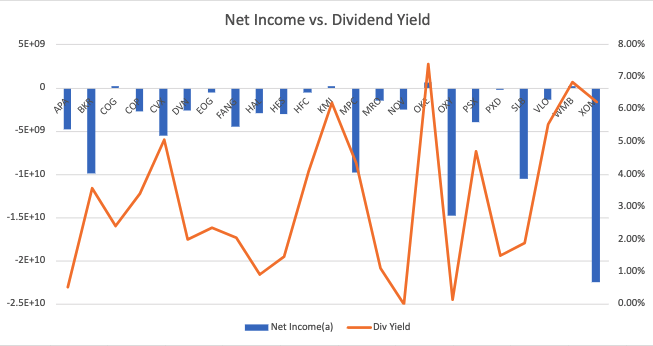

* A company's net income tells us how much profit/loss it has after each period after deducting its expenses. 
* This chart shows that there is an overall negative income residual by period end. 
* This could indicate each company is investing heavily in technology and equipment (Capex) or not generating enough revenue. 
* Companies that are generating positive net income have a higher dividend yield.
* There also appears to be outliers in this evaluation like XOM. 
  * XOM, who has the highest net loss, is also generating the second highest dividend yield.





> ### P/E Ratio 

> 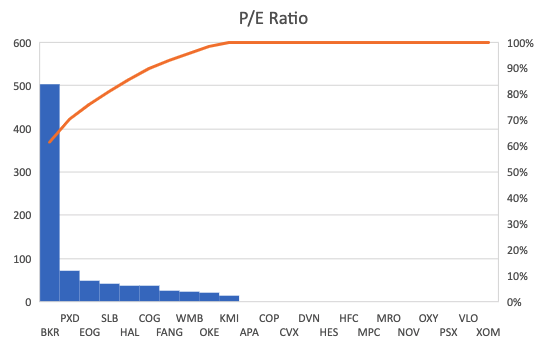

* BKR has the highest P/E ratio making up for more than half of the other companies P/E ratios combined. 
* A high P/E ratio means that investors are willing to pay a high share price today because of future growth expectations. 
* A good portion of hte companies have very low/almost zero P/E ratios. 
* This could mean that these stocks are a relative bargain in comparison to leading securities. 

> ### Excess Return vs. YTD Change

> 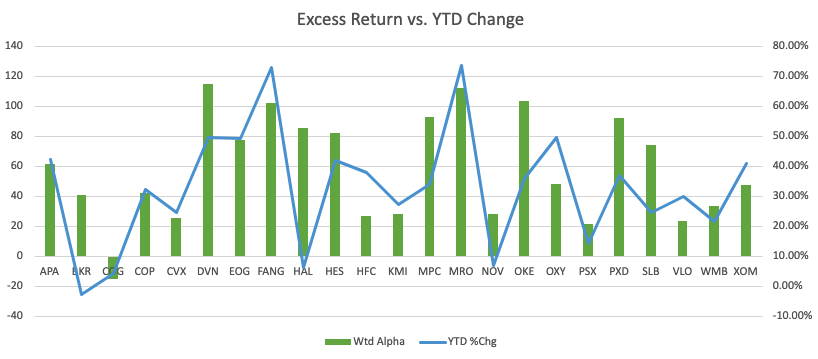

* A company's weighted alpha tells us if it was able to generate a return greater than its benchmark. 
* Companies with a high weighted alpha were able to experience a high YTD % change.
  * DVN, although generating return above its benchmark, was not able to produce a high YTD % change. 
  * FANG looks like a promising company to invest in because it was generating returns above its benchmark and producing a higher profit for investors. 

> ### Risk Assessment (Beta Analysis) 

> 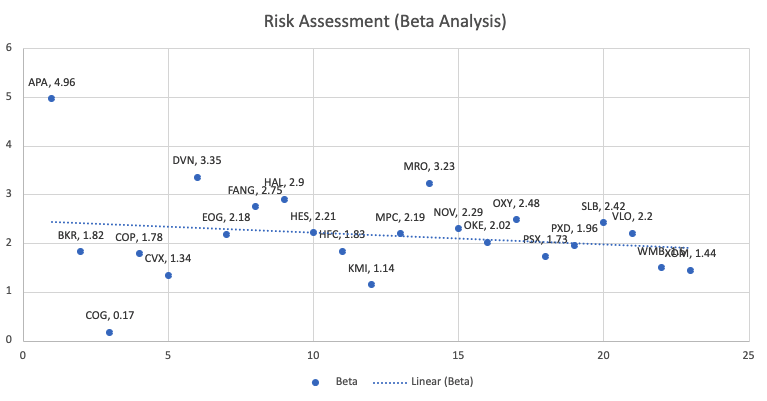

* The Energy Sector has a Beta trend line hovering around 2.5.
* This means that the Energy Sector tends to be more risky to invest in on average. 
* APA is a clear outlier with a Beta of 4.96, where COG tends to be a safer option with a Beta of 0.17.

> ### Comparable EPS (Twelve Trailing Months - TTM) 

> 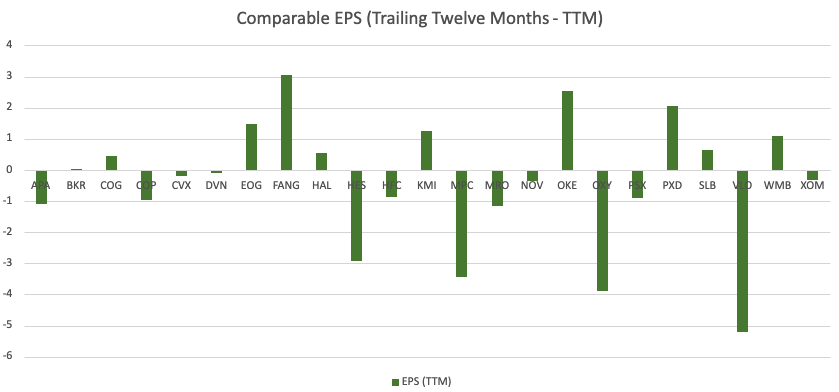

* There is no clear trend line in the Energy Sector's EPS. 
* FANG appears to be the most valuable company to investors with the highest EPS. 
  * A higher EPS signifies that the company generates higher prices relative to its share price. 
* VLO appears to be the least valuable company with the lowest EPS. 
  * This could mean that the company has spent a lot of money on growth and expansion in the past year. 

## **Final 10 Stock Picks** for our Client's Energy Sector Portfolio
  * #### **NOTE:** Check "**Portfolio Justification**" tab in our Excel workbook for justification as to why we included these 10 stocks in our Energy Sector Portfolio analysis
After providing through background analysis and insight into 23 different companies in the Energy Sector, we have came to conclusions on 10 different stocks we feel will perform best in our client's portfolio: 
* BKR - Baker Hughes Company
* COG - Cabot Oil & Gas Corp
* DVN - Devon Energy Corp
* EOG - Eog Resources
* FANG - Diamondback Energy
* KMI - Kinder Morgan
* MRO - Marathon Oil Corp
* OKE - Oneok Inc
* PXD - Pioneer Natural Resources Company
* WMB - Williams Companies

Within our Excel workbook, we explain the overall support and justification for selecting these stocks for our client's portfolio. Overall, we believe these stocks offer a good balance of future growth potential and current stock performace. We hope to see our Python analysis prove our conjectures made about our stock picks for our client's Energy Sector Portfolio.

# EDA of 10 Energy Sector Stocks




> ## Import Modules and Packages for Portfolio Analysis




In [ ]:
## Mount my personal Google Drive 
  # Not mounting specific file in drive since we are utilizing yahoo finance package to pull stock data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Python Data Analysis Modules 
import numpy as np # for numeric functions
import pandas as pd # for data analysis 
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns # library for boxplots and other plot functions 

In [ ]:
# Import Pyomo Optimization Packages to run code properly
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # Utilizing IPOPT Solver
except:
    pass

     |████████████████████████████████| 9.5MB 14.0MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 256kB 45.5MB/s 
     |████████████████████████████████| 163kB 49.5MB/s 


In [ ]:
# Stock-specific Import Packages
!pip install yahoo_fin # yahoofinance.com stock data
!pip install requests_html # HTML GET requests
import yahoo_fin.stock_info as si # To generate specific stock info for our 10 selected stocks

     |████████████████████████████████| 81kB 6.8MB/s 
     |████████████████████████████████| 92kB 7.5MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
  Created wheel for parse: filename=parse-1.19.0-cp37-none-any.whl size=24581 sha256=51a960f39a95895def02fc45c6df0262090cdcdc1e9184dbc762183ff99a9fc9
  Stored in directory: /root/.cache/pip/wheels/c0/39/ea/e2fd678bd130953f5438470b8dfa529f00787e9b8b92b27467
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13485 sha256=de9b589d1738631e847e806fd32646e110263251ce69d41c3685466741c58366
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-cp37-none-any.whl size=6067 sha256=8ebda06dd804d1a86c3259a502d6f10a409da806066feab1361661e3d077c6e8
  Stored in directory: /root/.cache/pip/wheels/f1/80/5a/444ba08a550cdd241bd9baf8bae44be750efe370

> ## Stock Data Retrieval from Yahoo Finance

In [ ]:
# First, We assign the ticker list from the stocks we want to pull from Yahoo Finance
tickers_list = ['BKR','COG','DVN','EOG','FANG','KMI','MRO','OKE','PXD','WMB']

# Then, we pull the historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2020',end_date='01/01/2021',interval='1mo') for ticker in tickers_list}

# Examine prices we pulled assigned to each of out 10 stocks 
dow_prices

{'BKR':                  open       high        low  ...   adjclose     volume  ticker
 2020-01-01  25.680000  25.990000  21.120001  ...  20.597157  119582300     BKR
 2020-02-01  21.570000  22.590000  15.710000  ...  15.424699  137404800     BKR
 2020-03-01  16.389999  17.400000   9.120000  ...  10.065838  236691700     BKR
 2020-04-01  10.090000  14.920000   9.440000  ...  13.373185  151609200     BKR
 2020-05-01  13.580000  16.730000  12.920000  ...  15.827333  109727100     BKR
 2020-06-01  16.500000  19.299999  14.070000  ...  14.927899  164117400     BKR
 2020-07-01  15.600000  17.180000  14.570000  ...  15.024896  142463700     BKR
 2020-08-01  15.350000  17.770000  14.120000  ...  13.851227  109337000     BKR
 2020-09-01  14.060000  15.610000  12.960000  ...  13.030819  156653300     BKR
 2020-10-01  13.000000  14.790000  12.130000  ...  14.481956  158162200     BKR
 2020-11-01  15.000000  20.420000  14.800000  ...  18.354923  167393000     BKR
 2020-12-01  19.389999  23.490000

In [ ]:
## Now, we have to extract just the data we need for the adjusted closing price (adjclose)
  # Get the adjclose price for the BKR (using BKR as a sample ticker before we do it for all of our 10 stocks)
prep_data = pd.DataFrame(dow_prices['BKR']['adjclose']).rename(columns = {"adjclose":"BKR"})

# Combine all the tickers togethers to form a better laid out readout
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose']) # Pulling 
prep_data

,BKR,COG,DVN,EOG,FANG,KMI,MRO,OKE,PXD,WMB
2020-01-01,20.597157,13.697221,20.199524,69.910873,71.407913,18.819613,11.216977,64.455063,131.194595,18.730000
2020-02-01,15.424699,13.630015,15.103144,60.859894,59.506596,17.490768,8.168564,58.151482,119.319046,17.245358
2020-03-01,10.065838,16.819811,6.426277,34.557178,25.146334,12.700653,3.261046,19.009048,68.172600,12.809544
2020-04-01,13.373185,21.154411,11.722507,45.707451,42.043282,13.895902,6.066140,26.086237,87.493469,17.984087
2020-05-01,15.827333,19.412741,10.162013,49.475525,41.116283,14.415970,5.293005,33.035908,89.736900,18.968243
2020-06-01,14.927899,16.898968,10.660242,49.174610,40.756363,14.084373,6.066140,29.911505,95.712830,17.659126
2020-07-01,15.024896,18.394102,9.950916,45.476322,38.846214,13.090948,5.441685,25.130342,95.506859,18.121161
2020-08-01,13.851227,18.659687,10.311386,44.361111,37.969101,13.071047,5.233533,25.566328,102.414650,19.665203
2020-09-01,13.030819,17.163013,9.164313,35.164055,29.603687,11.661796,4.054006,24.170786,84.736221,18.613737
2020-10-01,14.481956,17.588135,8.759509,33.500759,25.514996,11.255097,3.925149,26.980478,78.891319,18.530626


In [ ]:
# Examine 'prep_data' shape 
prep_data.shape

(12, 10)

> ## Data Conversion (PCT_Change)

In [ ]:
## Create return features for each stock ticker 
  # Going to use pct_change as the return 
return_data = pd.DataFrame() # Return data within the data frame
for i in tickers_list: # Performing this for all tickers in our portfolio 
  return_data[i] = prep_data[i].pct_change() # Formula: return_data = prep_data * pct_change

# Drop the null records 
return_data.dropna(inplace=True) # Drop NA records 

# Print return_data
return_data 

,BKR,COG,DVN,EOG,FANG,KMI,MRO,OKE,PXD,WMB
2020-02-01,-0.251125,-0.004907,-0.252302,-0.129465,-0.166667,-0.070610,-0.271768,-0.097798,-0.090519,-0.079265
2020-03-01,-0.347421,0.234027,-0.574507,-0.432185,-0.577419,-0.273865,-0.600781,-0.673112,-0.428653,-0.257218
2020-04-01,0.328571,0.257708,0.824152,0.322662,0.671945,0.094109,0.860182,0.372306,0.283411,0.403960
2020-05-01,0.183513,-0.082331,-0.133119,0.082439,-0.022049,0.037426,-0.127451,0.266411,0.025641,0.054724
2020-06-01,-0.056828,-0.129491,0.049029,-0.006082,-0.008754,-0.023002,0.146067,-0.094576,0.066594,-0.069016
2020-07-01,0.006498,0.088475,-0.066539,-0.075207,-0.046867,-0.070534,-0.102941,-0.159844,-0.002152,0.026164
2020-08-01,-0.078115,0.014439,0.036225,-0.024523,-0.022579,-0.001520,-0.038251,0.017349,0.072328,0.085207
2020-09-01,-0.059230,-0.080209,-0.111243,-0.207322,-0.220322,-0.107815,-0.225379,-0.054585,-0.172616,-0.053468
2020-10-01,0.111362,0.024770,-0.044172,-0.047301,-0.138114,-0.034874,-0.031785,0.116243,-0.068978,-0.004465
2020-11-01,0.267434,-0.015177,0.566629,0.382944,0.539291,0.235343,0.494950,0.276146,0.264203,0.093278


> ## Visualize Stock Data through Time Series

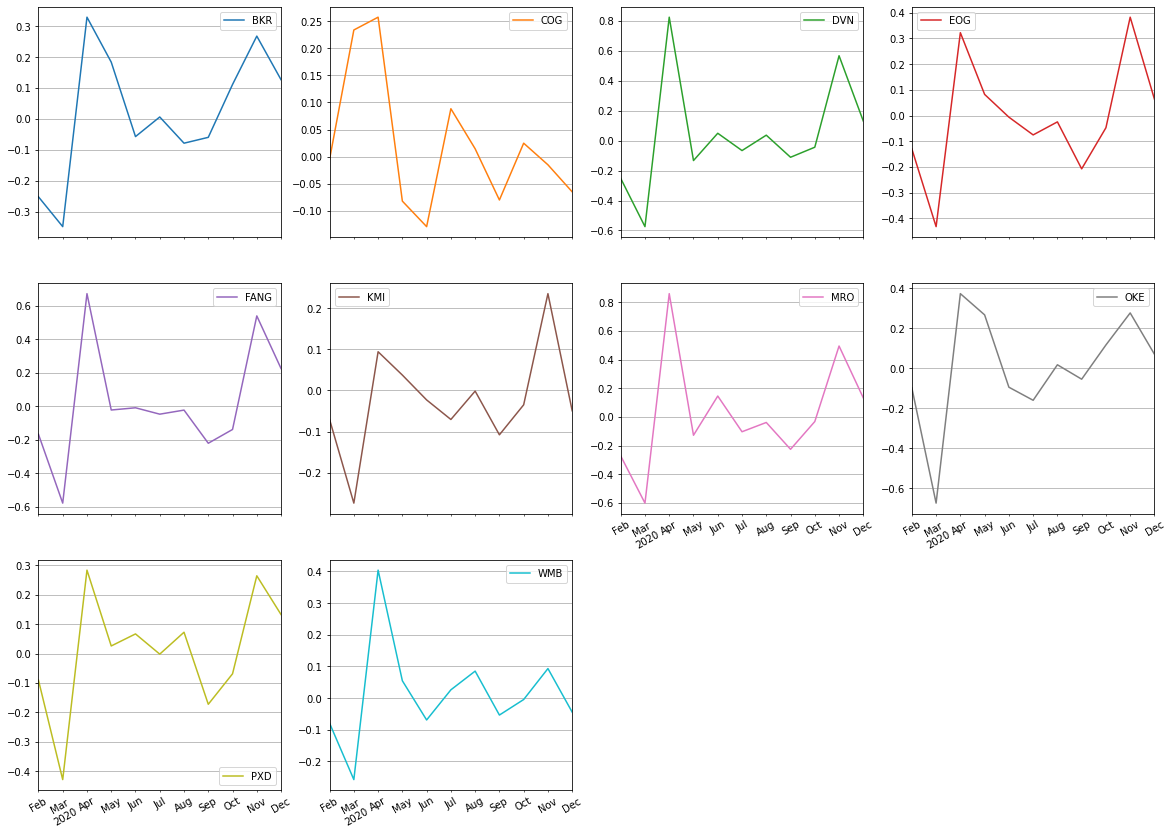

In [ ]:
# Return stock data to visualize percent change in stocks' time series data
return_data.plot(subplots=True, # Subplots must be produced to be able to graph all 10 different stocks
                     grid=True, # Enable grid so the data is easier to visualize 
                  layout=(3,4), # Size of each plot  
               figsize=(20,16)) # Complete figure size for each plot of data 
plt.show() # Show plots 

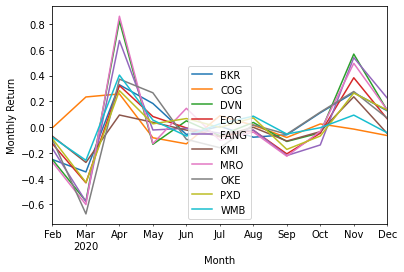

In [ ]:
#Now want to visualize stock data into one single graph
return_data.plot()
plt.xlabel('Month')
plt.ylabel('Monthly Return')
plt.show ()

The returns for each stock appear to be moving in the same direction. Large spikes in April/May as well as November/December. 


> ## Analysis for Stocks with Avg_Return, and StdDev_Return

In [ ]:
# Examine the daily average return of the stocks 
Avg_Return = pd.DataFrame(np.mean(return_data), columns=["Avg_Return"]) 
print(Avg_Return) # Print the averages in the data 

# Examine the std dev of daily return
Std_Dev_Return = pd.DataFrame(np.std(return_data), columns=["Std_Dev_Return"]) 
print(Std_Dev_Return) # Print the standard deviations in the data.

      Avg_Return
BKR     0.021030
COG     0.022013
DVN     0.038568
EOG    -0.006387
FANG    0.021260
KMI    -0.024065
MRO     0.021430
OKE     0.003502
PXD     0.007417
WMB     0.014143
      Std_Dev_Return
BKR         0.198491
COG         0.120220
DVN         0.361155
EOG         0.216634
FANG        0.333065
KMI         0.120622
MRO         0.373404
OKE         0.270444
PXD         0.191608
WMB         0.154530


> ## Create Covariance Matrix and Correlation Matrix

In [ ]:
# Build covariance matrix w/ .cov() function
Covariance_Matrix = return_data.cov() # Call return_data to utilize it within covariance matrix 
Covariance_Matrix # Print covariance matrix

,BKR,COG,DVN,EOG,FANG,KMI,MRO,OKE,PXD,WMB
BKR,0.043339,-0.001360,0.066403,0.042456,0.062668,0.021639,0.068428,0.053070,0.034828,0.026821
COG,-0.001360,0.015898,0.005984,-0.002333,0.002356,-0.003260,0.006026,-0.008702,-0.003901,0.005450
DVN,0.066403,0.005984,0.143476,0.079287,0.128886,0.040191,0.146736,0.085441,0.069131,0.053861
EOG,0.042456,-0.002333,0.079287,0.051623,0.076485,0.027572,0.081741,0.057411,0.043771,0.029783
FANG,0.062668,0.002356,0.128886,0.076485,0.122025,0.038584,0.132332,0.081704,0.066849,0.047882
KMI,0.021639,-0.003260,0.040191,0.027572,0.038584,0.016005,0.040487,0.031397,0.022855,0.014952
MRO,0.068428,0.006026,0.146736,0.081741,0.132332,0.040487,0.153374,0.087300,0.071753,0.054968
OKE,0.053070,-0.008702,0.085441,0.057411,0.081704,0.031397,0.087300,0.080454,0.048837,0.037420
PXD,0.034828,-0.003901,0.069131,0.043771,0.066849,0.022855,0.071753,0.048837,0.040385,0.026199
WMB,0.026821,0.005450,0.053861,0.029783,0.047882,0.014952,0.054968,0.037420,0.026199,0.026267


In [ ]:
# Build correlation matrix with .corr() function
Corr_matrix = return_data.corr() # Call return_data to utilize it within correlation matrix 
Corr_matrix # Print correlation matrix

,BKR,COG,DVN,EOG,FANG,KMI,MRO,OKE,PXD,WMB
BKR,1.000000,-0.051803,0.842098,0.897596,0.861756,0.821629,0.839312,0.898741,0.832490,0.794914
COG,-0.051803,1.000000,0.125289,-0.081426,0.053487,-0.204382,0.122031,-0.243318,-0.153945,0.266692
DVN,0.842098,0.125289,1.000000,0.921276,0.974075,0.838728,0.989169,0.795249,0.908186,0.877349
EOG,0.897596,-0.081426,0.921276,1.000000,0.963675,0.959233,0.918638,0.890839,0.958626,0.808784
FANG,0.861756,0.053487,0.974075,0.963675,1.000000,0.873102,0.967308,0.824602,0.952265,0.845746
KMI,0.821629,-0.204382,0.838728,0.959233,0.873102,1.000000,0.817170,0.874974,0.898978,0.729246
MRO,0.839312,0.122031,0.989169,0.918638,0.967308,0.817170,1.000000,0.785901,0.911700,0.866015
OKE,0.898741,-0.243318,0.795249,0.890839,0.824602,0.874974,0.785901,1.000000,0.856769,0.813992
PXD,0.832490,-0.153945,0.908186,0.958626,0.952265,0.898978,0.911700,0.856769,1.000000,0.804400
WMB,0.794914,0.266692,0.877349,0.808784,0.845746,0.729246,0.866015,0.813992,0.804400,1.000000


# Build Nonlinear Optimization Model for Energy Sector Portfolio Analysis

> ## Create Covariance Table

In [ ]:
# Create covariance table 
rd_cov = return_data.cov() # Renaming return_data covariance table to rd_cov
print('Covariance Matrix:') # Printing a title
print(rd_cov) # Printing the covaraince table
print('\n') # Returning a blank line for a space between covariance matric and average return table

## Reestablish the average of each stock in our portfolio 
  # These will be the objective function COEFFICIENTS in our optimization model! 
rd_return = return_data.mean() # Provides average returns of each stock
print('Average Return:') # Printing a title
print(rd_return) # Printing average return table

Covariance Matrix:
           BKR       COG       DVN  ...       OKE       PXD       WMB
BKR   0.043339 -0.001360  0.066403  ...  0.053070  0.034828  0.026821
COG  -0.001360  0.015898  0.005984  ... -0.008702 -0.003901  0.005450
DVN   0.066403  0.005984  0.143476  ...  0.085441  0.069131  0.053861
EOG   0.042456 -0.002333  0.079287  ...  0.057411  0.043771  0.029783
FANG  0.062668  0.002356  0.128886  ...  0.081704  0.066849  0.047882
KMI   0.021639 -0.003260  0.040191  ...  0.031397  0.022855  0.014952
MRO   0.068428  0.006026  0.146736  ...  0.087300  0.071753  0.054968
OKE   0.053070 -0.008702  0.085441  ...  0.080454  0.048837  0.037420
PXD   0.034828 -0.003901  0.069131  ...  0.048837  0.040385  0.026199
WMB   0.026821  0.005450  0.053861  ...  0.037420  0.026199  0.026267

[10 rows x 10 columns]


Average Return:
BKR     0.021030
COG     0.022013
DVN     0.038568
EOG    -0.006387
FANG    0.021260
KMI    -0.024065
MRO     0.021430
OKE     0.003502
PXD     0.007417
WMB     0.014143

> ## Build Concrete Model

In [ ]:
from pyomo.environ import * # Import Pyomo package 

# Defining model variable --> m 
m = ConcreteModel()

## Defining variables --> Bound all vars from (0 - 1) to constrain nonlinear model 
  # Each one is a stock in the Energy Sector Portfolio (BKR, COG, DVN, EOG, FANG, KMI, MRO, OKE, PXD, WMB)
m.BKR = Var(within=NonNegativeReals, bounds=(0,1)) # BKR stock variable 
m.COG = Var(within=NonNegativeReals, bounds=(0,1)) # COG stock variable
m.DVN = Var(within=NonNegativeReals, bounds=(0,1)) # DVN stock variable 
m.EOG = Var(within=NonNegativeReals, bounds=(0,1)) # EOG stock variable
m.FANG = Var(within=NonNegativeReals, bounds=(0,1)) # FANG stock variable
m.KMI = Var(within=NonNegativeReals, bounds=(0,1)) # KMI stock variable
m.MRO = Var(within=NonNegativeReals, bounds=(0,1)) # MRO stock variable
m.OKE = Var(within=NonNegativeReals, bounds=(0,1)) # OKE stock variable
m.PXD = Var(within=NonNegativeReals, bounds=(0,1)) # PXD stock variable
m.WMB = Var(within=NonNegativeReals, bounds=(0,1)) # WMB stock variable

> ## Declare Objective Function

In [ ]:
## Each term is taking the stock variable and multiplying by its average return (rd_return)
  # This provides the overall max average return prediction from the model
m.objective = Objective(expr =               
                        m.BKR * rd_return[0] + 
                        m.COG * rd_return[1] + 
                        m.DVN * rd_return[2] + 
                        m.EOG * rd_return[3] +  
                        m.FANG * rd_return[4] + 
                        m.KMI * rd_return[5] + 
                        m.MRO * rd_return[6] + 
                        m.OKE * rd_return[7] + 
                        m.PXD * rd_return[8] + 
                        m.WMB * rd_return[9],
                        sense=maximize) # Maximizing returns
  # The sum of all proportions = ALL stock proportions = 1
m.sum_proportions = Constraint(expr = m.BKR + 
                                      m.COG + 
                                      m.DVN + 
                                      m.EOG + 
                                      m.FANG + 
                                      m.KMI + 
                                      m.MRO + 
                                      m.OKE + 
                                      m.PXD + 
                                      m.WMB == 1) 

#Return Floor
m.return_floor = Constraint(expr = m.objective >= 0.015)

> ## Build out Risk Function

In [ ]:
# Define risk calculation function 
max_risk = 0.0015
def calc_risk():
## This is a list of all of the investment allocations in our Energy Sector portfolio 
  # We continuously update this as we work through the model
  proportions = [m.BKR, m.COG, m.DVN, m.EOG, m.FANG, m.KMI, m.MRO, m.OKE, m.PXD, m.WMB]
  risk_matrix = [] # left empty to hold risk matrix 
  
# Now beginnging to iterate through the covariance matrix
# Since there are 10 stocks we have 100 elements. These elements will be summed up at the end and that is our risk
  for index, col in enumerate(rd_cov.columns):
    i = 0 # Creating a counter
    risk = [] # Create an empty risk list
    for row in rd_cov[col]: # Sum these stock elements up to get the risk
      risk.append(proportions[index]*row*proportions[i])  # 'Risk Elements' are considered = cov(A,B)*prop(A)*prop(B) 
      i = i + 1 # Increment i
    risk_matrix.append(risk) # Append risk to the risk matrix list 
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum() 

# Creating a list of risks to solve over, incrementing by .0005 each time.
risk_limits = np.arange(0.0001, 0.0035, 0.00005) 
risk_limits #print the risks we are testing over

array([0.0001 , 0.00015, 0.0002 , 0.00025, 0.0003 , 0.00035, 0.0004 ,
       0.00045, 0.0005 , 0.00055, 0.0006 , 0.00065, 0.0007 , 0.00075,
       0.0008 , 0.00085, 0.0009 , 0.00095, 0.001  , 0.00105, 0.0011 ,
       0.00115, 0.0012 , 0.00125, 0.0013 , 0.00135, 0.0014 , 0.00145,
       0.0015 , 0.00155, 0.0016 , 0.00165, 0.0017 , 0.00175, 0.0018 ,
       0.00185, 0.0019 , 0.00195, 0.002  , 0.00205, 0.0021 , 0.00215,
       0.0022 , 0.00225, 0.0023 , 0.00235, 0.0024 , 0.00245, 0.0025 ,
       0.00255, 0.0026 , 0.00265, 0.0027 , 0.00275, 0.0028 , 0.00285,
       0.0029 , 0.00295, 0.003  , 0.00305, 0.0031 , 0.00315, 0.0032 ,
       0.00325, 0.0033 , 0.00335, 0.0034 , 0.00345])

> ## Execute Model

In [ ]:
# As model runs, risk solution is being updated for each limit and then solving the problem 
param_analysis = {} # Key = risk, value = stock allocations --> param_analysis
returns = {} # Key = Risk, value = return --> Returns 
for r in risk_limits: # Go through loop risks 
  m.total_risk = Constraint(expr = calc_risk()<= r) # Providing a constraint where total risk must be less than current (calc) risk
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write() # Solve model with IPOPT module imported earlier 
# Store our stock allocation proportions
  param_analysis[r] = [m.BKR(), m.COG(), m.DVN(), m.EOG(), m.FANG(), m.KMI(), m.MRO(), m.OKE(), m.PXD(), m.WMB()]
  
# Store the average returns based on the solution with the set risk solved on
  returns[r] = m.BKR()*rd_return[0] + m.COG()*rd_return[1] + m.DVN()*rd_return[2] + m.EOG()*rd_return[3] + m.FANG()*rd_return[4] + m.KMI()*rd_return[5] + m.MRO()*rd_return[6] + m.OKE()*rd_return[7] + m.PXD()*rd_return[8] + m.WMB()*rd_return[9]

    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time

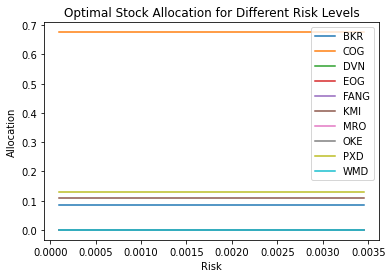

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
risk_allocations = param_analysis
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index') #create dataframe from the param dictionary
#Give the list of stocks for the column names
param_analysis.columns = ['BKR', 'COG', 'DVN', 'EOG', 'FANG', 'KMI', 'MRO', 'OKE', 'PXD', 'WMD']
param_analysis.plot() #Plot the overall analysis 
plt.title('Optimal Stock Allocation for Different Risk Levels') #Assign this title
plt.xlabel('Risk')
plt.ylabel('Allocation')
plt.show() #Display the chart

In [ ]:
print(param_analysis) # Print parameter analysis findings

              BKR      COG  DVN  EOG  FANG       KMI  MRO  OKE       PXD  WMD
0.00010  0.085966  0.67589  0.0  0.0   0.0  0.109668  0.0  0.0  0.128476  0.0
0.00015  0.085966  0.67589  0.0  0.0   0.0  0.109668  0.0  0.0  0.128476  0.0
0.00020  0.085966  0.67589  0.0  0.0   0.0  0.109668  0.0  0.0  0.128476  0.0
0.00025  0.085966  0.67589  0.0  0.0   0.0  0.109668  0.0  0.0  0.128476  0.0
0.00030  0.085966  0.67589  0.0  0.0   0.0  0.109668  0.0  0.0  0.128476  0.0
...           ...      ...  ...  ...   ...       ...  ...  ...       ...  ...
0.00325  0.085966  0.67589  0.0  0.0   0.0  0.109668  0.0  0.0  0.128476  0.0
0.00330  0.085966  0.67589  0.0  0.0   0.0  0.109668  0.0  0.0  0.128477  0.0
0.00335  0.085966  0.67589  0.0  0.0   0.0  0.109668  0.0  0.0  0.128476  0.0
0.00340  0.085966  0.67589  0.0  0.0   0.0  0.109668  0.0  0.0  0.128476  0.0
0.00345  0.085966  0.67589  0.0  0.0   0.0  0.109668  0.0  0.0  0.128477  0.0

[68 rows x 10 columns]


In [ ]:
# subset risk and reward data 
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.0001, 0.00015000000000000001, 0.00020000000000000004, 0.00025, 0.00030000000000000003, 0.00035000000000000005, 0.0004, 0.00045000000000000004, 0.0005000000000000001, 0.0005500000000000001, 0.0006000000000000002, 0.0006500000000000002, 0.0007000000000000001, 0.0007500000000000001, 0.0008000000000000001, 0.0008500000000000002, 0.0009000000000000002, 0.0009500000000000002, 0.0010000000000000002, 0.0010500000000000002, 0.0011000000000000003, 0.0011500000000000002, 0.0012000000000000003, 0.0012500000000000002, 0.0013000000000000002, 0.0013500000000000003, 0.0014000000000000002, 0.0014500000000000003, 0.0015000000000000002, 0.0015500000000000004, 0.0016000000000000003, 0.0016500000000000004, 0.0017000000000000003, 0.0017500000000000003, 0.0018000000000000004, 0.0018500000000000003, 0.0019000000000000004, 0.0019500000000000003, 0.0020000000000000005, 0.00205, 0.0021000000000000003, 0.00215, 0.0022, 0.0022500000000000003, 0.0023000000000000004, 0.00235, 0.0024000000000000002, 0.002450000000

Text(0, 0.5, 'Reward (Return)')

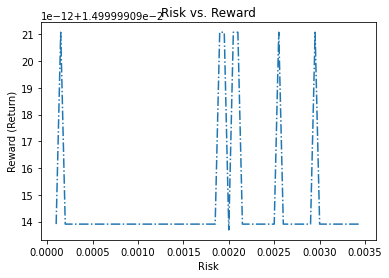

In [ ]:
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
title('Risk vs. Reward')
xlabel('Risk')
ylabel('Reward (Return)')

# Stock Price Prediction with Nonlinear Optimization Model: 01/01/2021 - 04/01/2021

> ## Pull Stock Data from Designated Date Period from Yahoo Finance

In [ ]:
# Assigning ticker list from stocks needed from Yahoo Finance
tickers_list = ['BKR','COG','DVN','EOG','FANG','KMI','MRO','OKE','PXD','WMB']

# Puling historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date = '05/01/2021',interval='1mo') for ticker in tickers_list}

# Examine prices pulled assigned to each of our 10 stocks 
dow_prices

{'BKR':                  open       high        low  ...   adjclose     volume  ticker
 2021-01-01  21.219999  24.040001  19.660000  ...  19.926222  132635800     BKR
 2021-02-01  20.370001  25.639999  19.950001  ...  24.280434  110315300     BKR
 2021-03-01  24.750000  25.440001  20.709999  ...  21.610001  215688600     BKR
 2021-04-01  21.620001  21.860001  18.750000  ...  20.080000  196931400     BKR
 
 [4 rows x 7 columns],
 'COG':              open       high        low      close   adjclose     volume ticker
 2021-01-01  16.49  19.510000  16.299999  18.330000  18.231504  104629100    COG
 2021-02-01  18.75  19.299999  17.170000  18.510000  18.510000  119291100    COG
 2021-03-01  18.65  19.549999  17.610001  18.780001  18.780001  131126300    COG
 2021-04-01  18.91  19.250000  15.990000  16.670000  16.670000  131137200    COG,
 'DVN':                  open       high        low  ...   adjclose     volume  ticker
 2021-01-01  16.000000  20.770000  15.710000  ...  16.259594  341477

> ## Prep Stock Data / Convert to Daily % Change

In [ ]:
#extract the adjusted close from the data because that is what we're most concerned with
#get the adjusted close price for BKR (one sample)
prep_data = pd.DataFrame(dow_prices['BKR']['adjclose']).rename(columns = {"adjclose":"BKR"})

#combine the remaining tickers to get their adjusted close prices
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,BKR,COG,DVN,EOG,FANG,KMI,MRO,OKE,PXD,WMB
2021-01-01,19.926222,18.231504,16.259594,50.361786,56.370663,13.613842,7.215786,38.232182,120.482796,20.873266
2021-02-01,24.280434,18.510000,21.277744,64.200272,68.889748,14.472420,11.062877,43.478653,148.057327,22.456213
2021-03-01,21.610001,18.780001,21.583969,72.125862,73.076027,16.392231,10.680000,49.731960,158.271942,23.291931
2021-04-01,20.080000,16.670000,23.379999,73.229675,81.730003,16.786037,11.260000,51.381187,153.830002,24.360001


In [ ]:
return_data = pd.DataFrame() #Blank dataframe to store converted daily pct. change data
for i in tickers_list: #Loop through for each stock
  return_data[i] = prep_data[i].pct_change() #Converting stock's column data to a percent change column.

return_data.dropna(inplace=True) #Remove values that are Null or NA
return_data #Print newly converted dataframe 

,BKR,COG,DVN,EOG,FANG,KMI,MRO,OKE,PXD,WMB
2021-02-01,0.218517,0.015276,0.308627,0.274781,0.222085,0.063067,0.533149,0.137227,0.228867,0.075836
2021-03-01,-0.109983,0.014587,0.014392,0.123451,0.060768,0.132653,-0.034609,0.143825,0.068991,0.037215
2021-04-01,-0.070801,-0.112354,0.083211,0.015304,0.118424,0.024024,0.054307,0.033162,-0.028065,0.045856


> ## Execute Nonlinear Optimization Model / Predict Portfolio Returns

In [ ]:
#import datetime to manipulate dates and times for our data.
import datetime

#Set current balance. Started with 1 million dollars on 1/1/21
current_balance = 1000000; 

#This list will store updated balances PER STOCK ALLOCATION based on the
#daily percent change for that stock
allocation_balances = []; 

#This list will hold the total portfolio value after each day 
#We will calculatte this by summing the allocation_balances for that day
daily_balances_list = [];
daily_balances_list.append(current_balance);

#Reference to a specific column
stock_list = ['BKR', 'COG', 'DVN', 'EOG', 'FANG', 'KMI', 'MRO', 'OKE', 'PXD', 'WMB']

#Loop through the allocations for this risk value 
#and multiply the balance with each one to split the money over those stocks.
#The order is ['BKR', 'COG', 'DVN', 'EOG', 'FANG', 'KMI', 'MRO', 'OKE', 'PXD', 'WMB']
for allocation in risk_allocations[0.0001]: # Setting risk limit to 0.0001 (0.01%) because of high volatility / high beta value of 2.012
  allocation_balances.append(current_balance * allocation)  

allocation_balances #print balances

# This runs through each row in the dataframe to get that day's daily percent change value.
# The corresponding stock change is multiplied by its allocated balance.
# The updated balances for each stock allocation are then summed to get the total portfolio value.
# The new portfolio value is then added to the portfolio data list which will be graphed.

for row in return_data.itertuples():
    allocation_balances[0] = allocation_balances[0]*(1 + row.BKR) #Update BKR allocation
    allocation_balances[1] = allocation_balances[1]*(1 + row.COG) #Update COG allocation
    allocation_balances[2] = allocation_balances[2]*(1 + row.DVN) #Update DVN allocation
    allocation_balances[3] = allocation_balances[3]*(1 + row.EOG) #Update EOG allocation
    allocation_balances[4] = allocation_balances[4]*(1 + row.FANG) #Update FANG allocation
    allocation_balances[5] = allocation_balances[5]*(1 + row.KMI) #Update KMI allocation
    allocation_balances[6] = allocation_balances[6]*(1 + row.MRO) #Update MRO allocation
    allocation_balances[7] = allocation_balances[7]*(1 + row.OKE) #Update OKE allocation
    allocation_balances[8] = allocation_balances[8]*(1 + row.PXD) #Update PXD allocation
    allocation_balances[9] = allocation_balances[9]*(1 + row.WMB) #Update WMB allocation

    daily_balances_list.append(sum(allocation_balances)); #Add new total portfolio value to balances list

# daily_balances_list
date_list = return_data.index.tolist() #Save dates column as a list
date_list.insert(0,datetime.datetime(2021, 1, 1)) #Add in January 1st since that is our starting day.
date_list 
# # # Displays full value instead of scientific notation value
pd.options.display.float_format = '{:.2f}'.format #Show full value not scientific notation

# #Create a dataframe with dates from Jan 1st through Nov 4th, with the day number and associated portfolio value
portfolio_final_data = pd.DataFrame({'Date':date_list, 'Portfolio Value':daily_balances_list})

portfolio_final_data #Display the Portfolio Value Table

,Date,Portfolio Value
0,2021-01-01,1000000.00
1,2021-02-01,1065429.96
2,2021-03-01,1090276.44
3,2021-04-01,1003888.16


> ## Energy Sector Portfolio Returns from 01/01/2021 - 04/01/2021 
  * January 01, 2021 = 1,000,000 (Starting Balance) 
  * Febraury 01, 2021 = 1,065,429.96
  * March 01, 2021 = **1,090,276.44**
  * April 01, 2021 = 1,003,888.16
    * If we had sold our stocks on March 1st, we would have made $90,276.44 in 3 months time. 
    * Because we held our stocks till April 1st, we only made $3,888.16. 
    * This equates to a difference in **potential returns** of over $86,000. 
    * We believe our model reacted this way due to the immensely high volatility in the Energy Sector during the months of March and April during 2020. 

> ## Plot Portfolio Returns

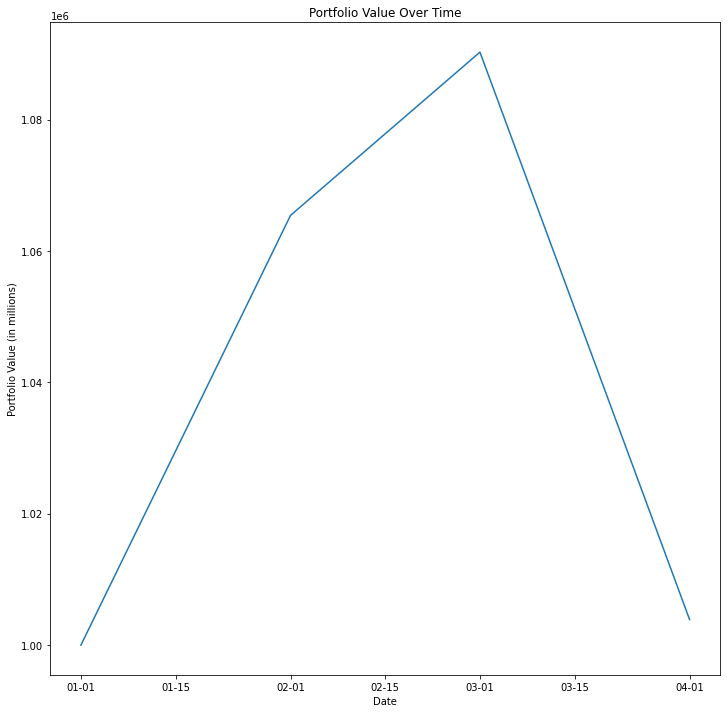

In [ ]:
#importing matplotlib to graph the results of our portfolio overtime
import matplotlib.pyplot as plt

#set shape of figure to ensure we can see labels as well as data points
fig, ax = plt.subplots(figsize=(12, 12))

#create the graph using the data labels from the previous code to plot
plot(date_list, daily_balances_list)
ylabel('Portfolio Value (in millions)')
xlabel('Date')
title('Portfolio Value Over Time')

#formatted dates for simplicity of viewing using the date formatter. 
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Nonlinear Optimization Model / Market Analysis Conclusions

>## Nonlinear Optimization Model Conclusions:
*   Because our portfolio had a relatively high Beta (2.012), we had difficulty satisfying our risk ceiling requirement in our Covariance model. 
*   Since our portfolio is overall more risky, we have the potential to attain higher returns.
*    COG has the lowest Beta so we understand why our allocation model gave this stock the highest investment in our portfolio of 0.67589.
*     The stocks allocated to our portfolio all have Betas below the industry average. If we were re-run this simulation we would choose stocks mainly based on their Betas rather than other areas. 
*    Investors should not invest in a portfolio allocated into just one industry. It is important to have a diverse portfolio to better protect against the unpredictability of the market. We noticed in the beginning of our code that the returns for each stock moved in the same direction with a high correlation and covariance. As a result, we did not change our allocation in response to different risk. 
*   Since returns are moving in the same direction, we will be gaining and losing money together due to our portfolio's lack of diversity. If we were to make a profit off this portfolio, we would likely sell in March when returns are at their peak.
*    If we were to sell in April, we would have made a profit of $3,888.16. This is not a lot of money considering we made a total investment of 1 million dollars. Our maximum profit would be optimized if we sold in March, where we had the potential profits of 90,276.44 dollars. 






> ## Overall Market Conclusions and Impacts
* Our Energy Sector portfolio analysis included 10 different Energy Sector stocks currently offered on the NYSE. 
* All of these companies experienced immense levels of volatility during the COVID-induced market crash in late-February. The Russian-Saudi Arabian oil price war happening at the same time also contributed to the crash of oil prices and futures.
* During the starting days of the COVID-19 Pandemic, the world stopped. Very few people were commuting to work and traveling, while at the same time, a price war between two huge oil-exporting nations was exacerbated volatility in the Energy industry. Worldwide energy and oil consumption dropped immensely. 
* For the first time in history, oil prices and futures fell below $0. Oil-based companies were practically paying for people to buy their oil products. The industry was trying to respond to excess levels of supply with virtually zero demand.
* Companies in our Energy Sector portfolio that relied on revenue generation from the purchases of their oil and natural gas products had their relatively stable market prices to be almost completely wiped out within a days time. 
* Eventually, oil prices and futures were able to restablize, but this caused some lasting effects with companies in our portfolio that heavily rely on revenue generated from the selling of their oil and natural gas products.
* From the results of our nonlinear optimization model above, we calculated 4 different stocks within our portfolio that were risk tolerant and were able to maximize profit in our portfolio: **BKR, COG, KMI, and PXD**. 
* Aside from the mathematical analysis provided above for why these stocks should be invested in, these companies have also developed and sell products that rely on different sectors of the Energy industry that do not rely on oil and natural gas. 
  * **BKR:** Baker Hughes Company markets themselves as an "energy technology company". They want to take traditional energy forward - making it safer, cleaner, and more efficient for the people and the planet. Some of the market offerings they provide include energy transition solutions, hydrogen technologies, and geothermal solutions (to name a few). Because of the diversified product selection BKR offers, it makes them more risk tolerant to oil price and futures volatility. 
  * **COG:** Cabot Oil & Gas Corporation market themselves as a leading independent natural gas producer focused on "safe, responsible, and sustainable operations". Although their products are very dependent on natural gas, their sustainability efforts have made them stand out against the competition. They offer comprehensive water management, air quality management, and incidental releases and waste managmenet as part of their efforts to make shale safer to extract and less impactful on the environment. 
  * **KMI:** Kinder Morgan Inc. is one of the largest energy infrastructure companies in North America. With over 83,000 miles of pipelines and 144 terminals, they will be very valuable to the Biden Administration's Infrastructure plan in the coming months. Their terminals and pipelines are being transformed to handle and store renewable fuels, chemicals, vegetable oils (ethanol), and other valuable commodities essential the future American economy. 
  * **PXD:** Pioneer Natural Resources operates an oil-drilling business in the Permian Basin. Although highly invested in oil-drilling technologies, PXD is harboring some of the world's leading scientists to transform the oil drilling process to make them more energy sustainable and efficient. All  drilling sites are heavily audited for their impacts on the environment and effects on any nearby communities. They are also a vertically-integrated company, making them more robust to oil price and future fluctuations, while also being able to better control their operating and shipping costs of their products. 

We hope this analysis provides more clear insights into the stock picks that will be included in our Energy Sector portfolio. Sustainability and clean-energy companies are the future for Energy Sector based companies, and along with our model optimization analysis, the current product offerings from these companies make sense as to why they should invested in our Energy Sector portfolio! 

# Contributions

* Sarah Fede: Created 5 charts, selected 10 stocks to analyze, developed covariance Excel model, conclusion, model analysis.
* Daniel Lesh: Cleaned up Excel workbook, imported 5 charts and analysis from Excel into Colab NB, built EDA for 10 stocks in Colab NB, built Nonlinear Optimization Model in Colab NB, offered additional conclusion statements / model analysis, and presentation video.
* Shiv Parekh: Commented on code in the Analysis section and presentation video.
* Akshay Bhagwhat: First draft of EDA (not included in Colab NB submission).

